**Gowtham Karthikeyan S**

**21BBS0157**

*Course:* Data Mining and Analytics (CBS3007)



---



# Importing Necessary Modules

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Question 1:

Consider the TATA MOTORS shares data from National stock exchange for the past 7 years. Implement the AutoRegressive Integrated Moving Average (ARIMA) model on the data and identify the 50 days moving average(MA), 200 days MA, 365 days MA and 500 days MA. Summarize the autocorrelations detected from the model.

In [29]:
file_path = 'TATAMOTORS-Price-History.csv'
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')
data.sort_values('Date', inplace=True)
data['close'] = pd.to_numeric(data['close'], errors='coerce')
data = data.dropna(subset=['close']).reset_index(drop=True)

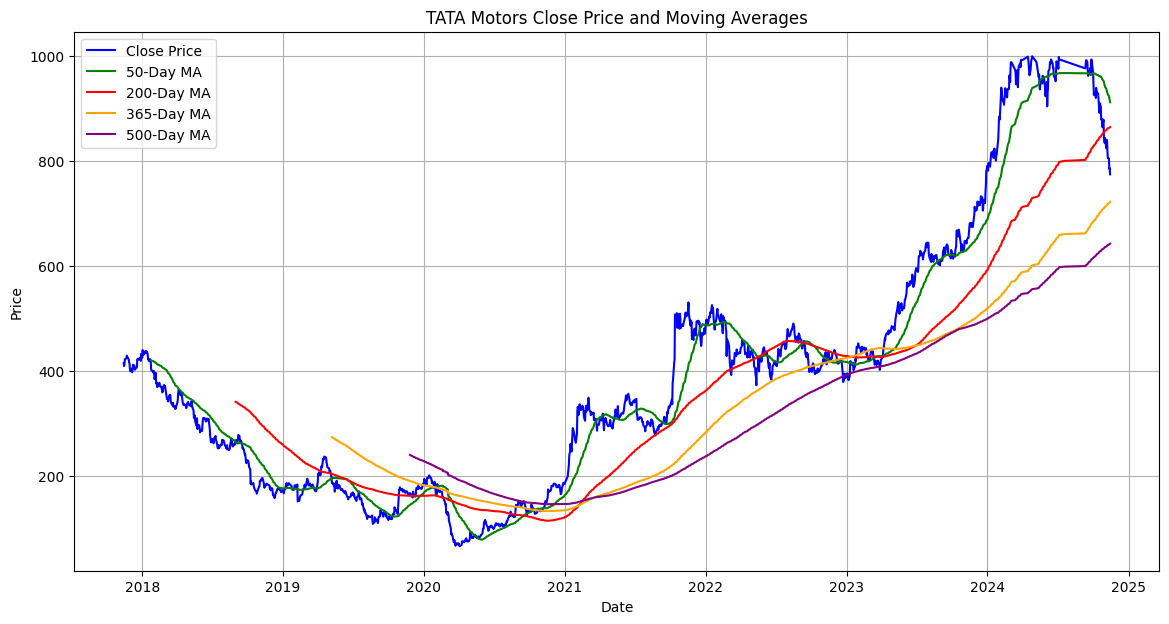

In [30]:
data['MA_50'] = data['close'].rolling(window=50).mean()
data['MA_200'] = data['close'].rolling(window=200).mean()
data['MA_365'] = data['close'].rolling(window=365).mean()
data['MA_500'] = data['close'].rolling(window=500).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', color='green')
plt.plot(data['Date'], data['MA_200'], label='200-Day MA', color='red')
plt.plot(data['Date'], data['MA_365'], label='365-Day MA', color='orange')
plt.plot(data['Date'], data['MA_500'], label='500-Day MA', color='purple')
plt.legend()
plt.title('TATA Motors Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

ADF Statistic: 0.18129211705618317
p-value: 0.9711925889151807
Critical Values: {'1%': -3.434246081994698, '5%': -2.863260900005045, '10%': -2.56768616361044}
Data is not stationary
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1682
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -6138.093
Date:                Sun, 17 Nov 2024   AIC                          12288.187
Time:                        12:56:34   BIC                          12320.746
Sample:                             0   HQIC                         12300.248
                               - 1682                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8566      0

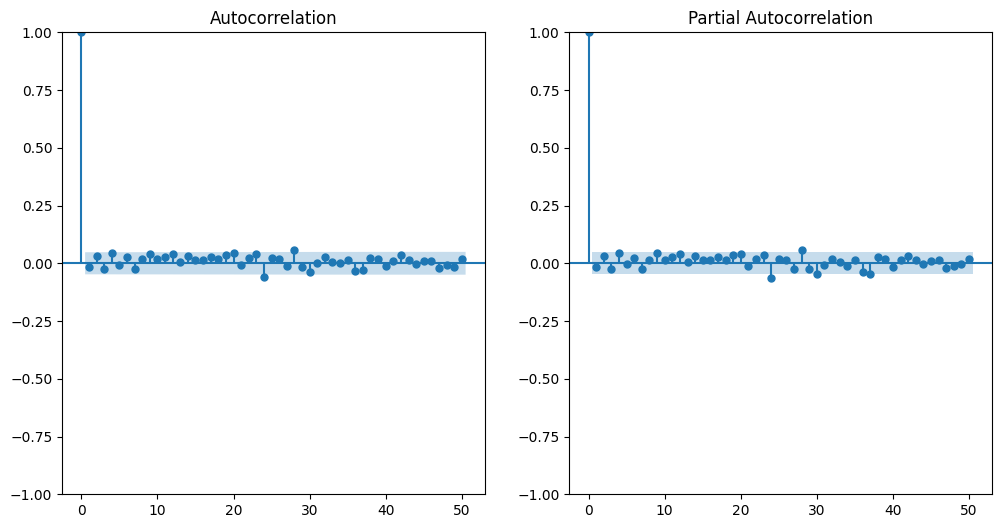

In [31]:
result = adfuller(data['close'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
if result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

data['close_diff'] = data['close'].diff().dropna()

model = ARIMA(data['close'].dropna(), order=(5, 2, 0))  # Adjust order (p, d, q) based on analysis
arima_result = model.fit()

print(arima_result.summary())

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['close_diff'].dropna(), ax=plt.gca(), lags=50)
plt.subplot(122)
plot_pacf(data['close_diff'].dropna(), ax=plt.gca(), lags=50)
plt.show()


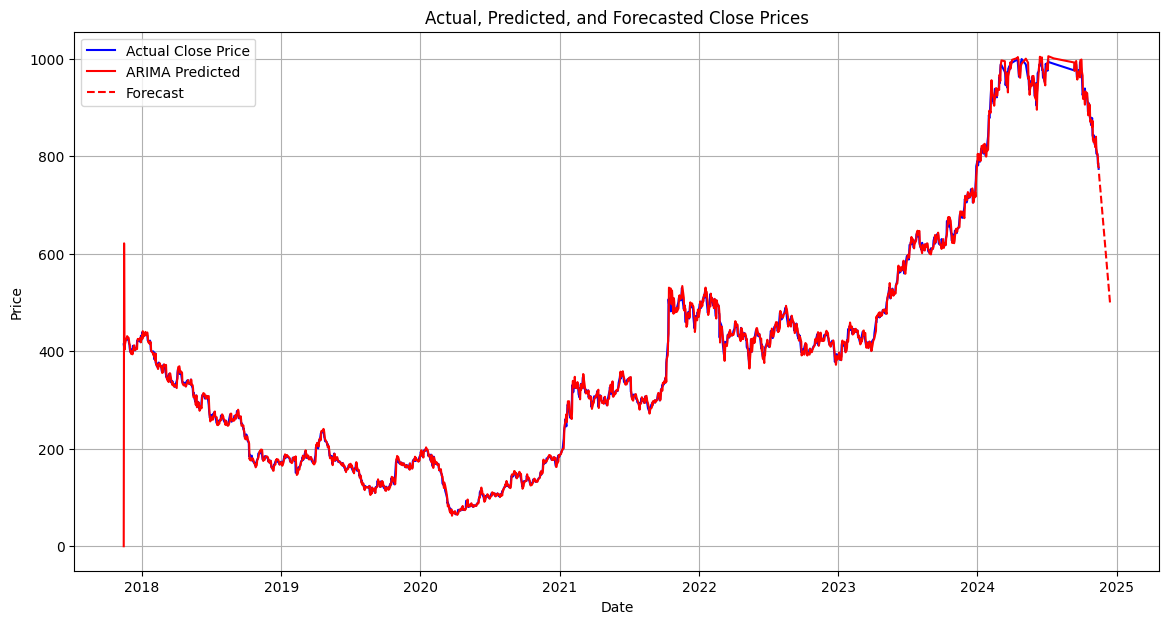

In [32]:
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps)

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['close'], label='Actual Close Price', color='blue')
plt.plot(data['Date'], arima_result.fittedvalues, label='ARIMA Predicted', color='red')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')
plt.legend()
plt.title('Actual, Predicted, and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


# Question2:

Implement the Logistic regression for predicting the Possibility of enrolling into a university. The dataset can determine the probability of a student getting accepted to a particular university or a degree course in a college by studying the relationship between the estimator variables, such as
CGPA, GRE, GMAT, or TOEFL scores, Research articles (conferences, journals published), Mini project experience, Internship completed

In [33]:
file_path = "university_admission_data.csv"
df = pd.read_csv(file_path)

X = df[["CGPA", "GRE", "TOEFL", "Research Articles", "Mini Projects", "Internship"]]

y = df["Accepted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the model:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

new_student = np.array([[3.8, 320, 110, 2, 1, 1]])
admission_probability = model.predict_proba(new_student)[0][1]

print("\nProbability of Admission for the new student:", admission_probability, "\n\n")

Accuracy of the model: 1.0

Confusion Matrix:
 [[7 0]
 [0 5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Probability of Admission for the new student: 0.9155329888021391 




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
